### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data['Bar'].fillna('never', inplace=True)
data['RestaurantLessThan20'].fillna('never', inplace=True)
data['CarryAway'].fillna('never', inplace=True)
data['Restaurant20To50'].fillna('never', inplace=True)
data['CoffeeHouse'].fillna('never', inplace=True)
data['car'].fillna('Unknown', inplace=True)

In [7]:
data['Bar'] = data['Bar'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['CarryAway'] = data['CarryAway'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('never','0').str.replace('less1','1').str.replace('1~3','2').str.replace('4~8','6').str.replace('gt8','8')
data['car'] = data['car'].str.replace('Car that is too old to install Onstar :D','unsupported car')
data['apptype']= np.where(((data['car'] == 'Unknown') | (data['car'] == 'unsupported car') | (data['car'] == 'Scooter and motorcycle')), 'mobile', np.where(data['car'] == 'do not drive', 'not driving', 'car'))
data['destinationNum']= np.where(data['destination'] == 'Home',0,np.where(data['destination'] == 'Work',1,2))
data['age'] = data['age'].str.replace('below21','Under 25').str.replace('21','Under 25').str.replace('26','Under 30').str.replace('31','Under 40').str.replace('36','Under 40').str.replace('41','Under 50').str.replace('46','Under 50')
data['BarVists']= np.where(data['Bar'] == '0',0,np.where(data['Bar'] == '1',1,np.where(data['Bar'] == '2',2,np.where(data['Bar'] == '6',6,8)))) 
data['CheapRestaurantVists']= np.where(data['RestaurantLessThan20'] == '0',0,np.where(data['RestaurantLessThan20'] == '1',1,np.where(data['RestaurantLessThan20'] == '2',2,np.where(data['RestaurantLessThan20'] == '6',6,8)))) 
data['CarryVisits']= np.where(data['CarryAway'] == '0',0,np.where(data['CarryAway'] == '1',1,np.where(data['CarryAway'] == '2',2,np.where(data['CarryAway'] == '6',6,8)))) 
data['incomeLimits']= np.where(data['income'] == '$37500 - $49999','$50K',np.where(data['income'] == 'Less than $12500','$12.5K',np.where(data['income'] == '$12500 - $24999','$25K',np.where(data['income'] == '$25000 - $37499','$37.5K',np.where(data['income'] == '$50000 - $62499','$62.5K',np.where(data['income'] == '$62500 - $74999','$75K',np.where(data['income'] == '$75000 - $87499','$87.5K',np.where(data['income'] == '$87500 - $99999','$100K','>100K'))))))))
data['education']= np.where(data['education'] == 'Bachelors degree','Bachelors',np.where(data['education'] == 'Some college - no degree','Some college',np.where(data['education'] == 'Graduate degree (Masters or Doctorate)','Masters/Doctorate',np.where(data['education'] == 'Associates degree','Associate','High School'))))



4. What proportion of the total observations chose to accept the coupon? 



In [8]:
data['Y'].value_counts().get(0,0)/len(data)
value_counts = data['Y'].value_counts()
print('Values of Y:',value_counts)
accepted_coupon = (data['Y'] == 1).sum()
print('Proportion of observations accepting the coupon:',round(accepted_coupon/len(data),2))

Values of Y: 1    7210
0    5474
Name: Y, dtype: int64
Proportion of observations accepting the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

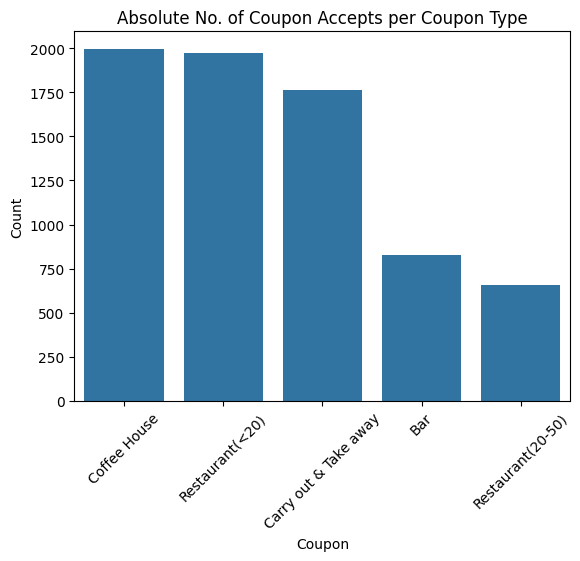

In [9]:
df_coupon = data.loc[(data['Y'] == 1)]
value_counts = df_coupon['coupon'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and title
plt.xlabel('Coupon')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Absolute No. of Coupon Accepts per Coupon Type')

# Show the plot
plt.show()

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\3882002961.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  percentages = pd.Series()


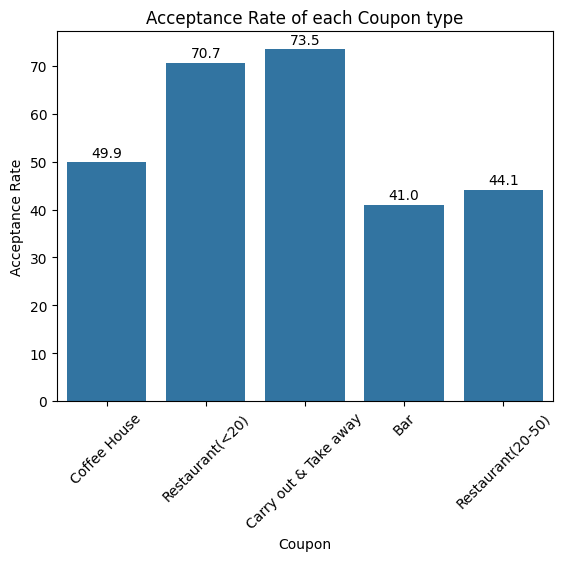

In [10]:

df_coupon = data.loc[(data['Y'] == 1)]
value_counts = df_coupon['coupon'].value_counts()
total_counts = data['coupon'].value_counts()
percentages = pd.Series()
for index, value in value_counts.items():
    percentages.at[index] = value / total_counts[index] * 100 
    
ax = sns.barplot(x=percentages.index, y=percentages.values)
for index, value in enumerate(percentages.values):
    ax.text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Add labels and title
# Add labels and title
ax.set_xlabel('Coupon')
ax.set_ylabel('Acceptance Rate')
ax.set_title('Acceptance Rate of each Coupon type')

plt.xticks(rotation=45)


# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

In [11]:
px.histogram(data,x='temperature',nbins=6)

In [12]:
fig = px.histogram(data, x="coupon", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400, bargap=0.1)
fig.update_layout(title='Coupon Types and their acceptance')

fig.show()

In [13]:
df_bar = data.loc[(data['coupon'] == 'Bar')]

fig = px.histogram(df_bar, x="incomeLimits", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400, bargap=0.1)
fig.update_layout(title='Influence of Income class')

fig.show()

In [14]:
df_bar = data.loc[(data['coupon'] == 'Bar')]

fig = px.histogram(df_bar, x="maritalStatus", color="Y",
                   barnorm='percent', text_auto='.1f')

fig.update_layout(width=600, height=400, bargap=0.1)
fig.update_layout(title='Influence of Marital status class')

fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
df_bar = data.loc[(data['coupon'] == 'Bar')]

2. What proportion of bar coupons were accepted?


In [16]:
df_bar['Y'].value_counts().get(0,0)/len(df_bar)
value_counts = df_bar['Y'].value_counts()
accepted_coupon = (df_bar['Y'] == 1).sum()
print()
print('\033[1m Proportion of observations accepting the coupon:\033[0m',round(accepted_coupon/len(df_bar),2))
print()


 Proportion of observations accepting the coupon: 0.41



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
df_bar_3orfewer = df_bar.loc[(df_bar['BarVists']<=2)]
print()
print('Bar visits 3 or fewer who took coupon:',(df_bar_3orfewer['Y'] == 1).sum())
print('Bar visits 3 or fewer:',len(df_bar_3orfewer))
print('\033[1m Acceptance Rate Bar 3 or fewer:\033[0m',round((df_bar_3orfewer['Y'] == 1).sum()/len(df_bar_3orfewer),2))

df_bar_3greater = df_bar.loc[(df_bar['BarVists'] >= 4)]
print()
print('Bar visits greater than 3 who took coupon:',(df_bar_3greater['Y'] == 1).sum())
print('Bar visits greater than 3:',len(df_bar_3greater))
print('\033[1m Acceptance Rate Bar 3 or greater: \033[0m',round((df_bar_3greater['Y'] == 1).sum()/len(df_bar_3greater),2))
print()


Bar visits 3 or fewer who took coupon: 674
Bar visits 3 or fewer: 1818
 Acceptance Rate Bar 3 or fewer: 0.37

Bar visits greater than 3 who took coupon: 153
Bar visits greater than 3: 199
 Acceptance Rate Bar 3 or greater:  0.77



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
df_driver = df_bar.loc[(df_bar['car'] != 'do not drive')]
t = df_driver.loc[(df_driver['age'] != 'Under 25')]
t = t.loc[(t['BarVists'] > 1)]

acceptance = round((t['Y'] == 1).sum()/len(t),2)
print()
print('Drivers who go to a bar more than once a month and are over the age of 25:')
print('Who took coupon:',(t['Y'] == 1).sum())
print('All:',len(t))
print('\033[1mAcceptance Rate: \033[0m',acceptance)

# All others
print()
print('All Others:')
acceptance2 = round(((data['Y'] == 1).sum()-(t['Y'] == 1).sum())/(len(data)-len(t)),2)
print('Who took coupon:',((data['Y'] == 1).sum()-(t['Y'] == 1).sum()))
print('All:',(len(data)-len(t)))
print('\033[1mAcceptance Rate - NOT of over 25, Driver, More than 1 bar attendance: \033[0m',acceptance2)




Drivers who go to a bar more than once a month and are over the age of 25:
Who took coupon: 290
All: 418
Acceptance Rate:  0.69

All Others:
Who took coupon: 6920
All: 12266
Acceptance Rate - NOT of over 25, Driver, More than 1 bar attendance:  0.56


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [19]:
df_driver = df_bar.loc[(df_bar['car'] != 'do not drive')]
df_gt1Barvisits = df_driver.loc[(df_driver['BarVists'] > 1)]
acc_df_gt1Barvisits = round((df_gt1Barvisits['Y'] == 1).sum()/len(df_gt1Barvisits),2)
print()
print('Drivers with >1 bar visits:')
print('\033[1mAcceptance Rate-\033[0m',acc_df_gt1Barvisits)

df_job_passenger = df_driver.loc[(df_driver['occupation'] != 'Farming Fishing & Forestry') & (df_driver['passanger'] != 'Kid/(s/)') & (df_driver['passanger'] != 'Alone')]
acc_df_job_passenger = round((df_job_passenger['Y'] == 1).sum()/len(df_job_passenger),2)
print()
print('Drivers with Non Fishing job and Non-kid passengers:')
print('\033[1mAcceptance Rate-\033[0m',acc_df_job_passenger)



Drivers with >1 bar visits:
Acceptance Rate- 0.69

Drivers with Non Fishing job and Non-kid passengers:
Acceptance Rate- 0.41


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [20]:
#driver
df_driver = df_bar.loc[(df_bar['car'] != 'do not drive') | (df_bar['car'] != 'Unknown')]

#driver with more than 1 bar visit
df_gt1Barvisits = df_driver.loc[(df_driver['BarVists'] > 1)]

#driver with more than 1 bar visit, who had passenger who was not kid
df_nonkid_passenger = df_gt1Barvisits.loc[((df_gt1Barvisits['passanger'] != 'Kid/(s/)') & (df_gt1Barvisits['passanger'] != 'Alone'))]

#driver with more than 1 bar visit, who had passenger who was not kid and NOT WIDOWED
df_condition1 = df_nonkid_passenger.loc[(df_nonkid_passenger['maritalStatus'] != 'Widowed')]
print('')
print('Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed')
print('\033[1m Acceptance Rate \033[0m',round((df_condition1['Y'] == 1).sum()/len(df_condition1),2))

# driver with more than 1 bar visit, who is under the age of 30
df_condition2 = df_gt1Barvisits.loc[(df_gt1Barvisits['age'] == 'Under 25') | (df_gt1Barvisits['age'] == 'Under 30')]
print('')
print('Drivers who go to bars more than once a month and are under the age of 30')
print('\033[1m Acceptance Rate \033[0m',round((df_condition2['Y'] == 1).sum()/len(df_condition2),2))

      
#go to cheap restaurants more than 4 times a month and income is less than 50K.
df_condition3 = df_driver.loc[(df_driver['CheapRestaurantVists']>4) & ((df_driver['income'] == '$25000 - $37499') | (df_driver['income'] == '$37500 - $49999'))]
print('')
print('Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K')
print('\033[1m Acceptance Rate \033[0m',round((df_condition3['Y'] == 1).sum()/len(df_condition3),2))

df_final = data.loc[data.isin(df_condition1).all(axis=1) | data.isin(df_condition2).all(axis=1) | data.isin(df_condition2).all(axis=1)]
acceptance2 = round((df_final['Y'] == 1).sum()/len(df_final),2)
print('')
print('Drivers who meet any of these three conditions:')
print('* go to bars more than once a month, had passengers that were not a kid, and were not widowed OR')
print('* go to bars more than once a month and are under the age of 30 OR')
print('* go to cheap restaurants more than 4 times a month and income is less than 50K.')
print('\033[1m Acceptance Rate - \033[0m',acceptance2)



Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
 Acceptance Rate  0.65

Drivers who go to bars more than once a month and are under the age of 30
 Acceptance Rate  0.72

Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
 Acceptance Rate  0.47

Drivers who meet any of these three conditions:
* go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
* go to bars more than once a month and are under the age of 30 OR
* go to cheap restaurants more than 4 times a month and income is less than 50K.
 Acceptance Rate -  0.67


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Coupons are most commonly accepted by drivers who meet the following criteria:
- Are under 30 years old.
- Visit bars more than once a month.
- Are not widowed; those who appear single or are in non-marital partnerships tend to accept coupons more frequently.
- Are mindful of avoiding bars when children are passengers in their vehicle.
- Belong to a lower income bracket and often dine at more affordable restaurants.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

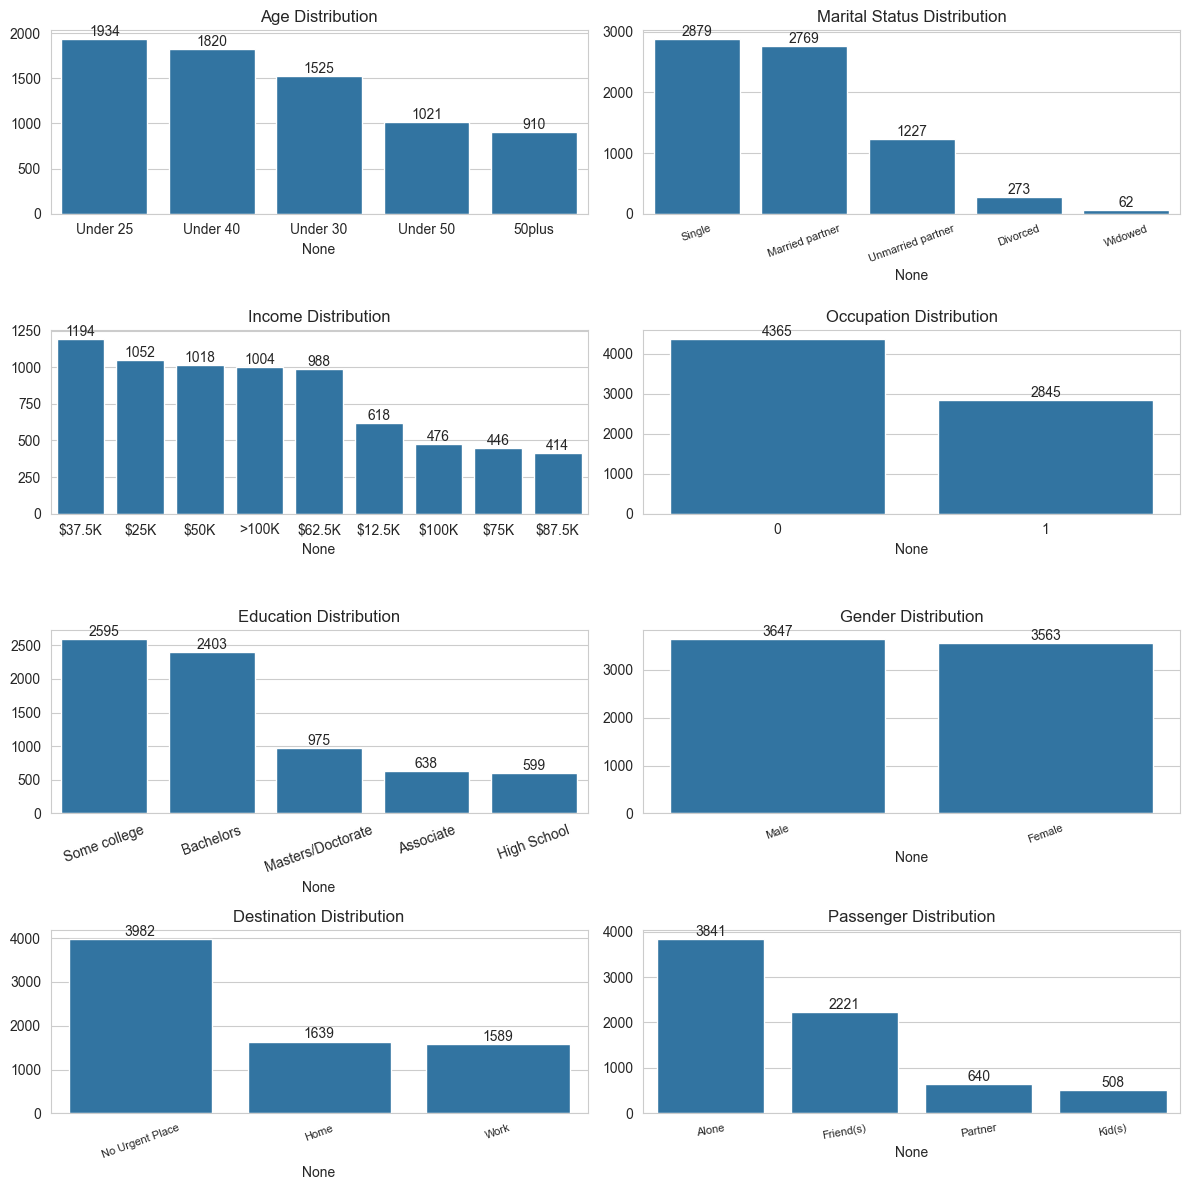

In [21]:
### STUDYING USER ATTRIBUTES

sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

df_coupon = data.loc[(data['Y'] == 1)]


# Plot for 'Age' column
value_counts = df_coupon['age'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values,ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
for index, value in enumerate(value_counts.values):
    axes[0, 0].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Plot for 'Marital Status' column
value_counts = df_coupon['maritalStatus'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution')
axes[0, 1].tick_params(axis='x', labelrotation=20,labelsize=8)

for index, value in enumerate(value_counts.values):
    axes[0, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Plot for 'IncomeLimits' column
value_counts = df_coupon['incomeLimits'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Income Distribution')
for index, value in enumerate(value_counts.values):
    axes[1, 0].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Plot for 'Has Children' column
value_counts = df_coupon['has_children'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Occupation Distribution')
for index, value in enumerate(value_counts.values):
    axes[1, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')
    
# Plot for 'Education' column
value_counts = df_coupon['education'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[2, 0])
axes[2, 0].set_title('Education Distribution')
axes[2, 0].tick_params(axis='x', labelrotation=20)
for index, value in enumerate(value_counts.values):
    axes[2, 0].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')
    
# Plot for 'Gender' column
value_counts = df_coupon['gender'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 1])
axes[2, 1].set_title('Gender Distribution')
axes[2, 1].tick_params(axis='x', labelrotation=20,labelsize=8)
for index, value in enumerate(highest_values.values):
    axes[2, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')
    
# Plot for 'destination' column
value_counts = df_coupon['destination'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[3, 0])
axes[3, 0].set_title('Destination Distribution')
axes[3, 0].tick_params(axis='x', labelrotation=20,labelsize=8)
for index, value in enumerate(highest_values.values):
    axes[3, 0].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')
    
    
# Plot for 'passanger' column
value_counts = df_coupon['passanger'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[3, 1])
axes[3, 1].set_title('Passenger Distribution')
axes[3, 1].tick_params(axis='x', labelrotation=20,labelsize=8)
for index, value in enumerate(highest_values.values):
    axes[3, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)
plt.xticks(fontsize=8)


# Show the plots
plt.show()



([0, 1, 2], [Text(0, 0, 'Sunny'), Text(1, 0, 'Snowy'), Text(2, 0, 'Rainy')])

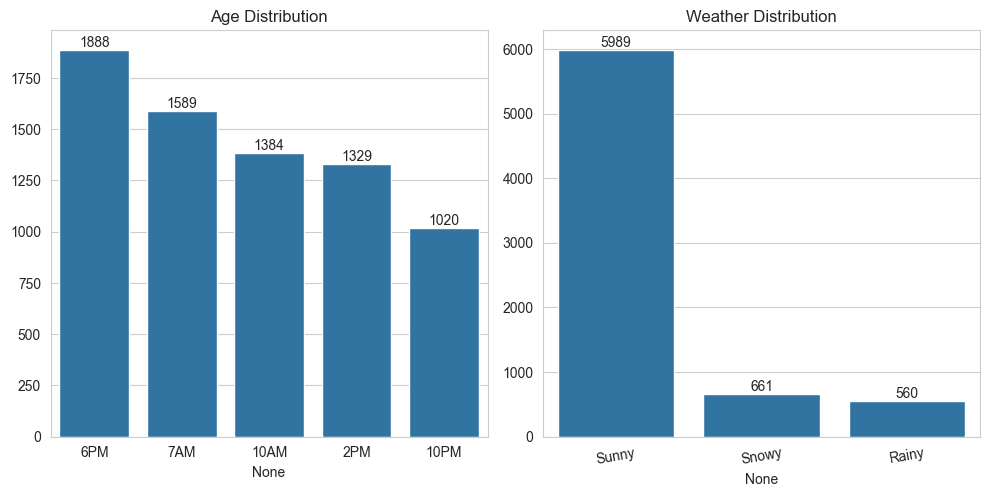

In [22]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for 'Age' column
value_counts = df_coupon['time'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values,ax=axes[0])
axes[0].set_title('Age Distribution')
for index, value in enumerate(value_counts.values):
    axes[0].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')


# Plot for 'Weather' column
value_counts = df_coupon['weather'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values,ax=axes[1])
axes[1].set_title('Weather Distribution')
for index, value in enumerate(value_counts.values):
    axes[1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)

### The characteristics of coupon users can be examined in depth:

- Drivers aged below 40 are the primary users of coupons.
- The majority are either single or in a relationship (married or otherwise).
- Their income typically falls below $62,500.
- Many have attended college, regardless of whether they have completed their degree.
- Users can be of any gender.


In [23]:
df_carry = data.loc[(data['coupon'] == 'Carry out & Take away')]
df_carry_coupon = df_carry.loc[(df_carry['Y'] == 1)]

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\512221812.py:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\512221812.py:22: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



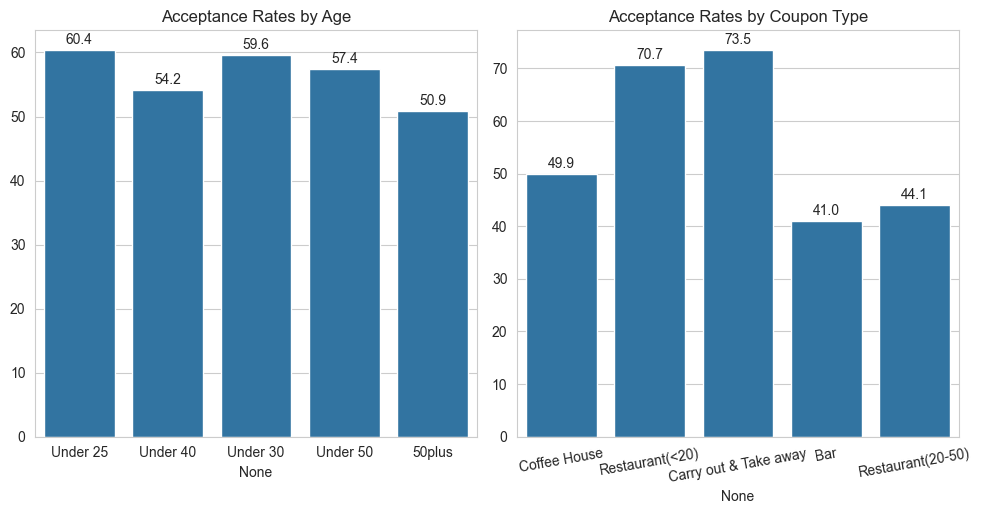

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\512221812.py:45: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\512221812.py:45: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\512221812.py:45: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\512221812.py:45: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\512221812.py:45


Most popular coupons by Age Group along with their Acceptance Rate

   ageGroup             couponType  acceptRate
0  Under 25        Restaurant(<20)        74.0
1  Under 50        Restaurant(<20)        72.7
2  Under 30  Carry out & Take away        73.2
3  Under 40  Carry out & Take away        72.2
4    50plus  Carry out & Take away        77.5


In [24]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for 'age' column

df_coupon = data.loc[(data['Y'] == 1)]
value_counts = df_coupon['age'].value_counts()
total_counts = data['age'].value_counts()
ageAcceptRate = pd.Series()
for index, value in value_counts.items():
    ageAcceptRate.at[index] = value / total_counts[index] * 100 
sns.barplot(x=ageAcceptRate.index, y=ageAcceptRate.values, ax=axes[0])
axes[0].set_title('Acceptance Rates by Age')
for index, value in enumerate(ageAcceptRate.values):
    axes[0].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Plot for 'Coupon Category' column
value_counts = df_coupon['coupon'].value_counts()
total_counts = data['coupon'].value_counts()
percentages = pd.Series()
for index, value in value_counts.items():
    percentages.at[index] = value / total_counts[index] * 100 
sns.barplot(x=percentages.index, y=percentages.values, ax=axes[1])
axes[1].set_title('Acceptance Rates by Coupon Type')
for index, value in enumerate(percentages.values):
    axes[1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)

# Show the plots
plt.show()

ageGroup = data['age'].unique()
percentages = pd.DataFrame(columns=['ageGroup', 'couponType','acceptRate'])
for element in ageGroup:
    df_temp = data.loc[data['age']== element]
    df_temp_coupon = df_temp.loc[df_temp['Y']== 1]
    value_counts = df_temp_coupon['coupon'].value_counts()
    total_counts = df_temp['coupon'].value_counts()

    per = pd.Series()
    for index, value in value_counts.items():
        per.at[index] = value / total_counts[index] * 100 

    s_dict = per.to_dict()
    # Find the key corresponding to the maximum value
    max_key = max(s_dict, key=s_dict.get)
    # Retrieve the maximum value
    max_value = s_dict[max_key]
    row_data = {'ageGroup': element, 'couponType': max_key, 'acceptRate':round(max_value,1)} 
    percentages.loc[len(percentages)] = row_data

print()
print('\033[1mMost popular coupons by Age Group along with their Acceptance Rate\033[0m')
print()
print(percentages)



## Coupons are predominantly used for takeout and delivery services, as well as for more affordable dining establishments


We can further examine the coupon acceptance rate within the carryout and takeaway category. Our analysis will focus on the income levels of individuals who use these coupons, their marital status, and the times they most frequently redeem them. Additionally, we will investigate how the presence of children influences this choice.

In [25]:
df_carry_coupon = df_carry.loc[(data['Y'] == 1)]
value_counts = df_carry_coupon['incomeLimits'].value_counts()
total_counts = df_carry['incomeLimits'].value_counts()
incomeAcceptRate = pd.Series()
for index, value in value_counts.items():
    incomeAcceptRate.at[index] = value / total_counts[index] * 100 

df_carry_poor = df_carry.loc[(df_carry['incomeLimits'] == '$12.5K') | (df_carry['incomeLimits'] == '$37.5K') | (df_carry['incomeLimits'] == '$50K')]
df_carry_poor_coupon = df_carry_poor.loc[(data['Y'] == 1)]
value_counts = df_carry_poor_coupon['maritalStatus'].value_counts()
total_counts = df_carry_poor['maritalStatus'].value_counts()
mStatusAcceptRate = pd.Series()
for index, value in value_counts.items():
    mStatusAcceptRate.at[index] = value / total_counts[index] * 100 

df_carry_poor_widowed = df_carry_poor.loc[(df_carry_poor['maritalStatus'] == 'Widowed')]
df_carry_poor_widowed_coupon = df_carry_poor_widowed.loc[(data['Y'] == 1)]
value_counts = df_carry_poor_widowed_coupon['has_children'].value_counts()
total_counts = df_carry_poor_widowed['has_children'].value_counts()
hasChildrenAcceptRate = pd.Series()
for index, value in value_counts.items():
    hasChildrenAcceptRate.at[index] = value / total_counts[index] * 100 

value_counts = df_carry_poor_widowed_coupon['destination'].value_counts()
total_counts = df_carry_poor_widowed['destination'].value_counts()
destinationAcceptRate = pd.Series()
for index, value in value_counts.items():
    destinationAcceptRate.at[index] = value / total_counts[index] * 100 


C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\1102072823.py:4: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\1102072823.py:12: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\1102072823.py:20: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\u6rramac\AppData\Local\Temp\ipykernel_16784\1102072823.py:26: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



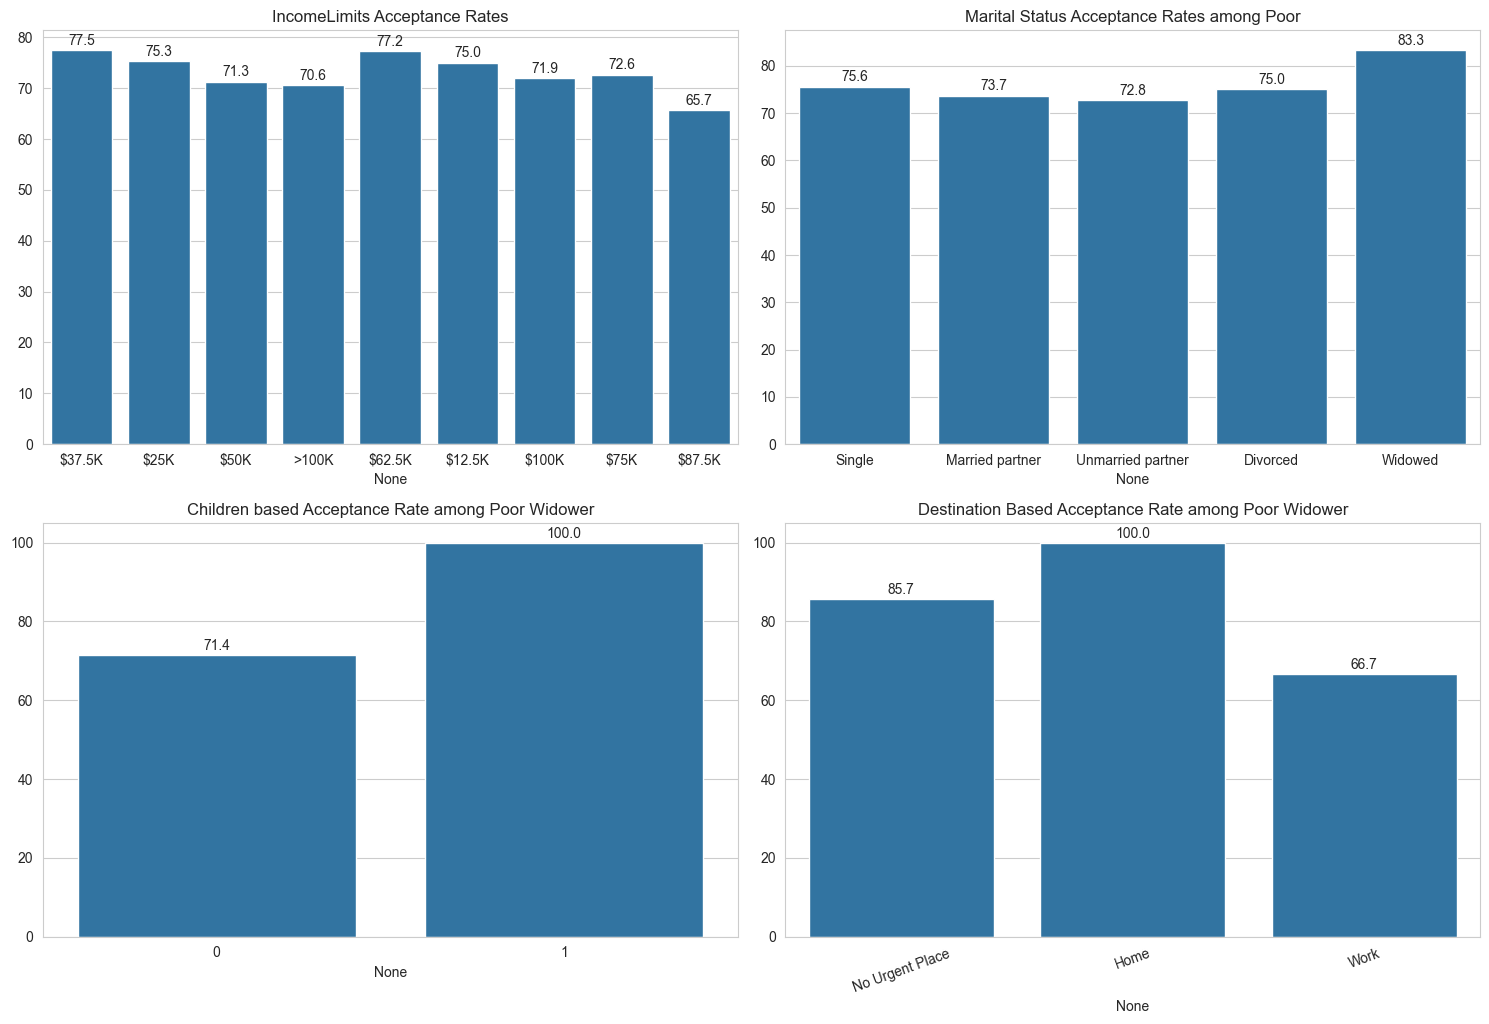

In [26]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'incomeLimits' column

sns.barplot(x=incomeAcceptRate.index, y=incomeAcceptRate.values, ax=axes[0, 0])
axes[0, 0].set_title('IncomeLimits Acceptance Rates')
for index, value in enumerate(incomeAcceptRate.values):
    axes[0, 0].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Plot for 'Marital Status' column

sns.barplot(x=mStatusAcceptRate.index, y=mStatusAcceptRate.values, ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Acceptance Rates among Poor')
for index, value in enumerate(mStatusAcceptRate.values):
    axes[0, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Plot for 'Children' column
sns.barplot(x=hasChildrenAcceptRate.index, y=hasChildrenAcceptRate.values, ax=axes[1, 0])
axes[1, 0].set_title('Children based Acceptance Rate among Poor Widower')
for index, value in enumerate(hasChildrenAcceptRate.values):
    axes[1, 0].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Plot for 'Destination' column
sns.barplot(x=destinationAcceptRate.index, y=destinationAcceptRate.values, ax=axes[1, 1])
axes[1, 1].set_title('Destination Based Acceptance Rate among Poor Widower')
for index, value in enumerate(destinationAcceptRate.values):
    axes[1, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=20)


# Show the plots
plt.show()

### Coupons that are frequently redeemed for takeout and delivery exhibit the following traits -
- General Acceptance Rate: 0.74
- Most individuals in this category redeem these coupons three or more times.
- The demographic includes widowed individuals aged over 50.
- Families with children are more inclined to choose takeout options.
- This group generally falls within the lower income range.
- These coupons are mainly utilized when heading to their residence.